# Sentiment Analysis 1

## Table of Contents:
Twitter Analysis of the Russian-Ukraine Crisis
  * Data Preprocessing
  * EDA
  * Feature Extraction
  * ML Model Predictions
  * Cross Validation
  * Evaluation

### Import Libraries

In [181]:
# For dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing all nltk related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('all')
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

# Subjectivity and Polarity
from textblob import TextBlob

# Regular Expressions
import re
import string

# Bag of Words representation
import collections
from sklearn.feature_extraction.text import CountVectorizer

# Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# To ignore warning
import warnings
warnings.filterwarnings("ignore")

# Emotion
# !pip install nrclex
from nrclex import NRCLex

# Mime type rendering
# !pip install nbformat
import nbformat

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to D:\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to D:\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     D:\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     D:\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     D:\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

In [182]:
# Set Pandas truncation of long strings
pd.set_option('display.max_colwidth', 1000)

### Import Data

In [183]:
data_sentiment = pd.read_csv('ukrainerussian_tweets.csv')

In [184]:
data_sentiment.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1590510105598259201,1590510105598259201,2022-11-10 01:02:14 UTC,2022-11-10,01:02:14,0,1162601483856039936,sumanth09315243,WAGMIFestival.eth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1590510093610909698,1589760170938470400,2022-11-10 01:02:11 UTC,2022-11-10,01:02:11,0,1085482994176012288,liberalismisco1,Liberalism is Cool,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bjovan3', 'name': '🇷🇸 مها', 'id': '710383228805320704'}, {'screen_name': 'KimDotcom', 'name': 'Kim Dotcom', 'id': '611986351'}]",NaN,NaN,NaN,NaN
2,1590510091157274624,1590035806433210368,2022-11-10 01:02:10 UTC,2022-11-10,01:02:10,0,19697793,crypto_knight_3,Big Phil 🍥,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Trollstoy88', 'name': 'Trollstoy', 'id': '1487069808818544646'}]",NaN,NaN,NaN,NaN
3,1590510084802883584,1590510084802883584,2022-11-10 01:02:09 UTC,2022-11-10,01:02:09,0,3627349575,engineer_psych,Dark6Light,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1590510082969989120,1590508019862843392,2022-11-10 01:02:08 UTC,2022-11-10,01:02:08,0,1541625790634270720,deonrichar1,The In Your Face Show W/Dion DB😅🤗🇺🇸⚖️🕙🙏✨,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'hrkbenowen', 'name': 'Ben Owen 🇺🇸', 'id': '542962969'}]",NaN,NaN,NaN,NaN


### Explanation on what we are looking out for:
* What are we trying to tackle?
  *  Indulge in such a topic where we analyse the emotions of the general public as tensions
continued to arise between Russian and Ukraine supporters. Therefore, we are doing sentiment analysis on
the Ukraine-Russia War on Twitter.
* Objectives:
  * Identify the mental state of the general public based on the comments extracted from the tweets on Twitter
  * Understand how this conflict has affected the general public using sentiment analysis
  * Data Source: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated

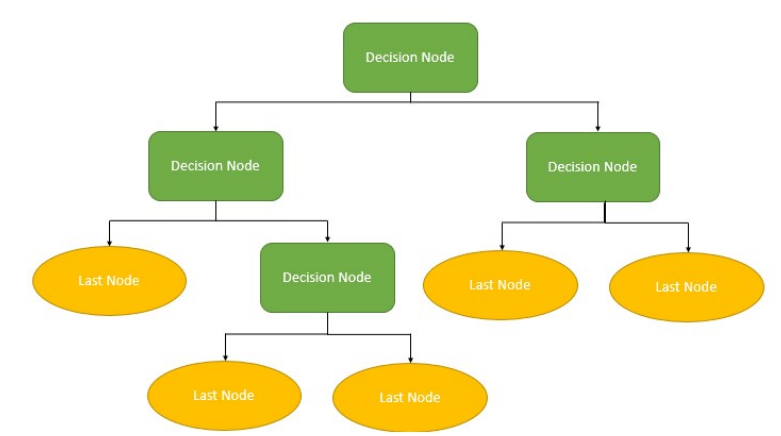


### Inspect the data & Explore Data

In [185]:
# Retrieve all the columns within the dataframe
data_sentiment.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [186]:
# View the trpes of data collected in each column of the data frame
data_sentiment.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [187]:
# The main set of data we will be preprocessing for detecting emotions -> Tweet column
data_sentiment['tweet']

0                                                                                                                @jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi     and russia and china are the new order
1                                                                                                                     @bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?
2                                                                                                                                                                                                                                       @Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now
3                                                                                                

In [188]:
# Extracting columns required to perform sentiment analysis
df_tweets1 = pd.DataFrame({'tweet': pd.Series(data_sentiment['tweet']), 'language': pd.Series(data_sentiment['language'])})

In [189]:
df_tweets = data_sentiment[['tweet' , 'language']]

In [190]:
df_tweets.equals(df_tweets1)

True

### EDA

In [191]:
df_tweets['length'] = df_tweets['tweet'].apply(len)

In [192]:
df_tweets.head()

,tweet,language,length
0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187
1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182
2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68
3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189
4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115


### Plot a bar graph to show the distribution of the top 5 languages reflected in the twitter dataset

In [193]:
# Printing out unique row data in the langauge column
print(df_tweets["language"].unique())

['en' 'qme' 'pt' 'nl' 'it' 'ca' 'in' 'und' 'ta' 'ja' 'fr' 'zh' 'vi' 'ro'
 'th' 'de' 'ht' 'es' 'qht' 'ur' 'ru' 'fi' 'ar' 'cs' 'pl' 'hi' 'tl' 'tr'
 'no' 'et' 'uk' 'el' 'da' 'qam' 'iw' 'sv' 'lt' 'bg']


In [194]:
# Counting the number of each language type using value_counts() function
df_tweets['language'].value_counts()

language
en     8793
pt      343
it      232
qme     138
und      80
in       54
th       53
es       38
vi       37
ru       36
ca       34
de       27
ja       26
fr       25
nl       13
ar       11
qht       9
fi        8
pl        6
ro        5
zh        5
et        4
cs        4
uk        4
hi        4
tl        4
no        2
ht        2
tr        2
qam       2
lt        1
sv        1
iw        1
ur        1
da        1
el        1
ta        1
bg        1
Name: count, dtype: int64

<Axes: xlabel='language'>

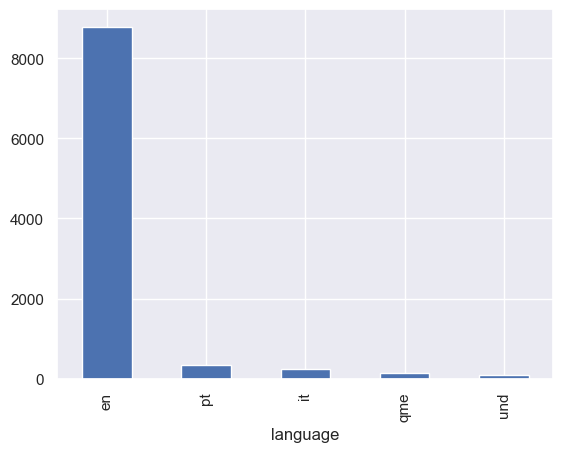

In [195]:
df_tweets['language'].value_counts()[0:5].plot(kind = 'bar')

In [196]:
# Choosing top 5 language
top5_lang = df_tweets['language'].value_counts()[0:5]

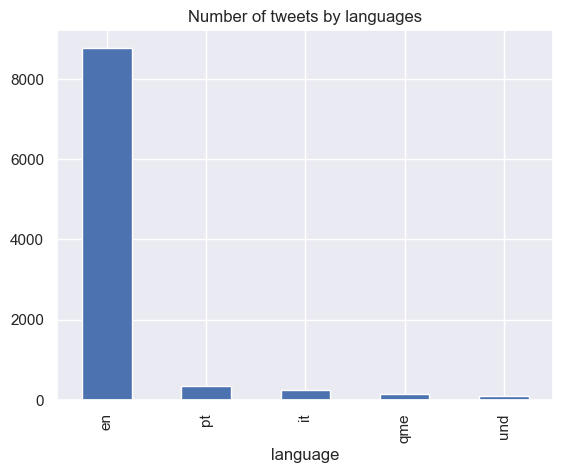

In [197]:

top5_lang.plot(kind='bar')
plt.title('Number of tweets by languages')
plt.show()


<Axes: xlabel='language'>

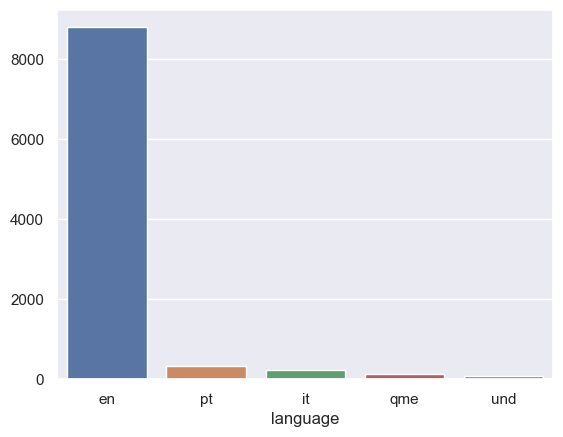

In [198]:
# Plotting the Bar Graph
# Setting theme for the sns background
sns.set_theme(style='darkgrid')
# Plot bar graph using barplot() function
sns.barplot(x=top5_lang.index , y =top5_lang.values )

### Data Cleaning
We will now be taking the tweet data that are in english language

In [199]:
en_tweets = df_tweets.query('language == "en"').reset_index()

In [200]:
en_tweets

,index,tweet,language,length
0,0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187
1,1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182
2,2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68
3,3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189
4,4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115
...,...,...,...,...
8788,10004,Ukraine has won the war. Russia is leaving Ukraine after heavy losses and humiliation.,en,86
8789,10005,"Biden says it remains to be seen if the Kherson withdrawal will lead to some ""recalibration of positions"" over the winter and if Ukraine will be willing to compromise with Russia.",en,179
8790,10006,"Talks with Russia? No way, say Ukrainians | Russia-Ukraine war News | Al Jazeera https://t.co/L6Eh1ps5SF via @AJEnglish",en,120
8791,10007,@DylanBurns1776 Supporting kurds to sow division in Iran and Syria and Iraq is ok since it's not Russia that's doing it,en,119


In [201]:
# Setting lemmatizer variable
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [202]:
# Processing Tweet data
def tweet_processor(tweet_data):
  tweet_data = tweet_data.lower()
  # Removes any content that is in the format is "[example_text]"
  tweet_data = re.sub('\[.*?\]', '', tweet_data)
  # Remove any text that is not lowercased
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)
  return(tweet_data)

In [203]:
# Apply the tweet_processor to the first row


In [204]:
# Processing Tweet data in more detail
def tweet_processor(tweet_data):
  # Changing all tweet texts to be lowercase
  tweet_data = tweet_data.lower()

  # Removing punctuation
  tweet_data = re.sub('\[.*?\]', '', tweet_data)

  # Removing special characters and numbers
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)

  # Removing hashtags
  tweet_data = re.sub("#", " ", tweet_data)

  # Removing RT
  tweet_data = re.sub("RT[\s]+", "", tweet_data)

  # Removing hyperlinks
  tweet_data = re.sub('https?://\S+|www\.\S+', '', tweet_data)

  tweet_data = re.sub('<.*?>+', '', tweet_data)

  tweet_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweet_data)

  # Removing lines separated by \n
  tweet_data = re.sub('\n', '', tweet_data)

  # Removing usernames
  tweet_data = re.sub('\w*\d\w*', '', tweet_data)

  # Removing stopwords
  tweet_data = [word for word in tweet_data.split(' ') if word not in stopword]
  tweet_data = " ".join(tweet_data)

  # Lemmatisation
  tweet_data = [lemmatizer.lemmatize(word) for word in tweet_data.split(' ')]
  tweet_data = " ".join(tweet_data)
  # tweet_data = ",".join([str(i) for i in tweet_data])
  return tweet_data

In [205]:
# Copying dataframe and storing it in a new dataframe
processed_tweet_data = df_tweets.copy()

In [206]:
# Applying the tweet_processor function created
processed_tweet_data['Reviewed_Tweet'] = df_tweets['tweet'].apply(tweet_processor)

In [207]:
# Displaying processed tweet data
processed_tweet_data['Reviewed_Tweet']

0                                                                        jensstoltenberg natootan terrorist organization world  member white unipolar way multi     russia china new order
1                                                                  bjovan kimdotcom youre talking ukraine invaded russia trying seize capital sure youre confusing two country one another
2                                                                                                                                             trollstoy bet russia wish hadnt wasted syria
3                                                           last meeting lukashenko putin talking respect thst west respect u negotiate stoltenberg show respect russia   httpstcoeptjtwhg
4                                                                                                                    hrkbenowen wouldnt russia im putinpuppet aint playin steamroll season
                                                                 

### More EDA

In [208]:
# Subjectivity of the processed data from 0 to 1, 0 means neutral/facts, 1 means personal opinion
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


In [209]:
# Polarity of the processed data from -1 to 1, -1 means negative, 0 means neutral, 1 means positive
# Create a function to get the polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [210]:
# Creating columns to display subjectivity and polarity
processed_tweet_data['Subjectivity'] = processed_tweet_data['Reviewed_Tweet'].apply(getSubjectivity)
processed_tweet_data['Polarity'] = processed_tweet_data['Reviewed_Tweet'].apply(getPolarity)

In [211]:
# processed_tweet_data
processed_tweet_data

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity
0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187,jensstoltenberg natootan terrorist organization world member white unipolar way multi russia china new order,0.227273,0.068182
1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182,bjovan kimdotcom youre talking ukraine invaded russia trying seize capital sure youre confusing two country one another,0.644444,0.100000
2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000
3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189,last meeting lukashenko putin talking respect thst west respect u negotiate stoltenberg show respect russia httpstcoeptjtwhg,0.066667,0.000000
4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115,hrkbenowen wouldnt russia im putinpuppet aint playin steamroll season,0.000000,0.000000
...,...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukraine after heavy losses and humiliation.,en,86,ukraine war russia leaving ukraine heavy loss humiliation,0.500000,-0.200000
10005,"Biden says it remains to be seen if the Kherson withdrawal will lead to some ""recalibration of positions"" over the winter and if Ukraine will be willing to compromise with Russia.",en,179,biden say remains seen kherson withdrawal lead recalibration position winter ukraine willing compromise russia,0.750000,0.250000
10006,"Talks with Russia? No way, say Ukrainians | Russia-Ukraine war News | Al Jazeera https://t.co/L6Eh1ps5SF via @AJEnglish",en,120,talk russia way say ukrainian russiaukraine war news al jazeera httpstcolehpssf via ajenglish,0.000000,0.000000
10007,@DylanBurns1776 Supporting kurds to sow division in Iran and Syria and Iraq is ok since it's not Russia that's doing it,en,119,dylanburns supporting kurd sow division iran syria iraq ok since russia thats,0.375000,0.375000


### Word Cloud

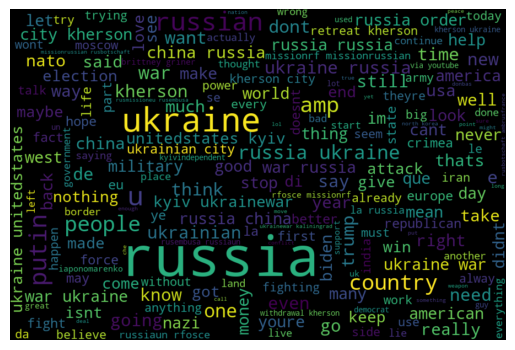

In [212]:
allTweets = ' '.join([tweets for tweets in processed_tweet_data['Reviewed_Tweet']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(allTweets)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Computing negative, neutral and positive analysis

In [213]:
def getComputation(score):
    if score < -0.5:
        return 'Very Negative'
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
processed_tweet_data['Computation_Analysis'] = processed_tweet_data['Polarity'].apply(getComputation)






In [214]:
# processed_tweet_data
processed_tweet_data

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis
0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187,jensstoltenberg natootan terrorist organization world member white unipolar way multi russia china new order,0.227273,0.068182,Positive
1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182,bjovan kimdotcom youre talking ukraine invaded russia trying seize capital sure youre confusing two country one another,0.644444,0.100000,Positive
2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000,Negative
3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189,last meeting lukashenko putin talking respect thst west respect u negotiate stoltenberg show respect russia httpstcoeptjtwhg,0.066667,0.000000,Neutral
4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115,hrkbenowen wouldnt russia im putinpuppet aint playin steamroll season,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukraine after heavy losses and humiliation.,en,86,ukraine war russia leaving ukraine heavy loss humiliation,0.500000,-0.200000,Negative
10005,"Biden says it remains to be seen if the Kherson withdrawal will lead to some ""recalibration of positions"" over the winter and if Ukraine will be willing to compromise with Russia.",en,179,biden say remains seen kherson withdrawal lead recalibration position winter ukraine willing compromise russia,0.750000,0.250000,Positive
10006,"Talks with Russia? No way, say Ukrainians | Russia-Ukraine war News | Al Jazeera https://t.co/L6Eh1ps5SF via @AJEnglish",en,120,talk russia way say ukrainian russiaukraine war news al jazeera httpstcolehpssf via ajenglish,0.000000,0.000000,Neutral
10007,@DylanBurns1776 Supporting kurds to sow division in Iran and Syria and Iraq is ok since it's not Russia that's doing it,en,119,dylanburns supporting kurd sow division iran syria iraq ok since russia thats,0.375000,0.375000,Positive


In [215]:
processed_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet                 10009 non-null  object 
 1   language              10009 non-null  object 
 2   length                10009 non-null  int64  
 3   Reviewed_Tweet        10009 non-null  object 
 4   Subjectivity          10009 non-null  float64
 5   Polarity              10009 non-null  float64
 6   Computation_Analysis  10009 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 547.5+ KB


### Plotting Polarity and Subjectivity
Polarity of the processed data - Ranges from -1 to 1; -1 means negative, 0 means neutral, 1 means positive <br>
Subjectivity of processed data - Ranges from 0 to 1; 0 means neutral/facts, 1 means personal opinion

In [216]:
# Creating a new dataframe sort_data to sort te polarity amd computation analysis
sort_data = processed_tweet_data.sort_values(by=['Polarity'])

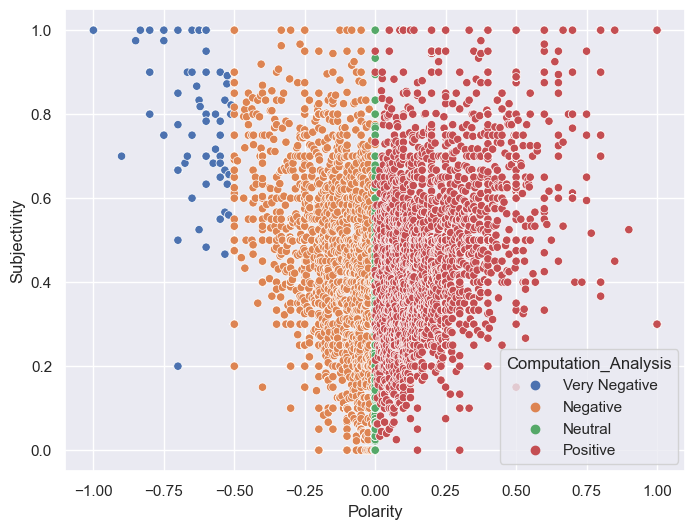

In [217]:
# Plotting our scatter plot
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Polarity', y='Subjectivity', hue='Computation_Analysis', data=sort_data)
plt.show()

In [218]:
# Creating our variables to store each column
# !pip install plotly
import plotly.figure_factory as ff
positive = sort_data[sort_data.Computation_Analysis=='Positive']
neutral = sort_data[sort_data.Computation_Analysis=='Neutral']
neg = sort_data[sort_data.Computation_Analysis=='Negative']
vneg = sort_data[sort_data.Computation_Analysis=='Very Negative']



hist_data = [positive['length'],neutral['length'] , neg['length'] , vneg['length']]

group_labels = ['Positive', 'Neutral', 'Negative', 'Very Negative']

colors = ['black', 'red']

### Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

### Add title
fig.update_layout(title_text='Length distribution of ham and spam messages',
                 template = 'simple_white')
fig.show()

### Computing percentage of positive, neutral and negative tweets

In [219]:
# Percentage of positive tweets
posTweets = sort_data[sort_data.Computation_Analysis=='Positive']
posTweets = posTweets['Reviewed_Tweet']
round((posTweets.shape[0]/sort_data.shape[0]*100), 1)



36.1

In [220]:
# Percentage of neutral tweets
posTweets = sort_data[sort_data.Computation_Analysis=='Neutral']
posTweets = posTweets['Reviewed_Tweet']
round((posTweets.shape[0]/sort_data.shape[0]*100), 1)



41.4

In [221]:
# Percentage of negative tweets
posTweets = sort_data[sort_data.Computation_Analysis=='Negative']
posTweets = posTweets['Reviewed_Tweet']
round((posTweets.shape[0]/sort_data.shape[0]*100), 1)



20.8

In [222]:
# Percentage of very negative tweets
posTweets = sort_data[sort_data.Computation_Analysis=='Very Negative']
posTweets = posTweets['Reviewed_Tweet']
round((posTweets.shape[0]/sort_data.shape[0]*100), 1)



1.8

In [223]:
sort_data.Computation_Analysis.value_counts(normalize = True)* 100

Computation_Analysis
Neutral          41.372765
Positive         36.057548
Negative         20.751324
Very Negative     1.818363
Name: proportion, dtype: float64

### Graphical Representation of Tweet Analysis

<Axes: title={'center': 'Russian vs Ukraine Sentiment Analysis'}, xlabel='Computation_Analysis', ylabel='count'>

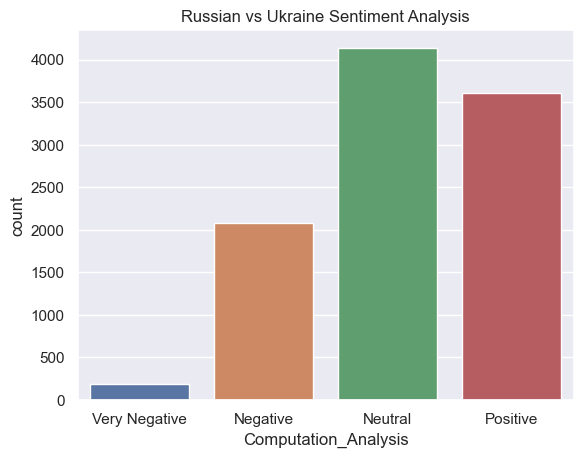

In [224]:
sort_data['Computation_Analysis'].value_counts()
plt.title('Russian vs Ukraine Sentiment Analysis')
# plt.xlabel('General Sentiment Type')
# plt.ylabel('Count')
sns.countplot(x='Computation_Analysis', data=sort_data)

Text(0.5, 1.0, 'Russian VS Ukraine Sentiment Analysis')

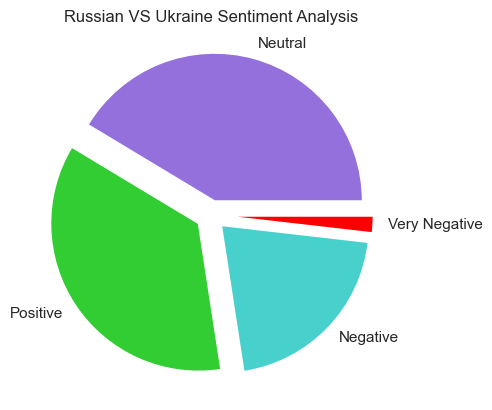

In [225]:
tags = sort_data['Computation_Analysis'].value_counts()

colors = {'mediumturquoise', 'limegreen', 'mediumpurple', 'red'}
explode=(0.1,0.1,0.1,0.1 )

tags.plot(kind='pie', explode=explode,colors=colors, label='')
plt.title('Russian VS Ukraine Sentiment Analysis')



### Emotion Detection

In [226]:
# Using a python library to determine the extent of the person's emotions(e.g. fear, anger, anticipation, ...)
sort_data['emotions'] = sort_data['Reviewed_Tweet'].apply(lambda x: NRCLex(x).affect_frequencies)
sort_data['emotions'].tail(15)

7353                                                    {'fear': 0.16666666666666666, 'anger': 0.16666666666666666, 'anticip': 0.0, 'trust': 0.16666666666666666, 'surprise': 0.0, 'positive': 0.16666666666666666, 'negative': 0.16666666666666666, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0, 'anticipation': 0.16666666666666666}
8081                                                                                                                                                                         {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 1.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
8348                                                                                                                                                                         {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.5, 'surprise': 0.0, 'positive': 0.5, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
1437                  

In [227]:
# Removing column with emotions and the extent in dictionaries, extracting the type of emotions from the dictionary,
# concatenating as different columns into sort_data dataframe
sort_data = pd.concat([sort_data.drop(['emotions'],axis=1), sort_data['emotions'].apply(pd.Series)],axis=1)


In [228]:
sort_data.head(5)

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
5482,"@BahatiAllyLane @KyivIndependent For the record, in the metaphor, the dying whale is Russia. I'd say bear, but remoras are fish and the metaphor would be lost. Maybe a tick, on a bear, that's about to die a terrible death.",en,223,bahatiallylane kyivindependent record metaphor dying whale russia id say bear remora fish metaphor would lost maybe tick bear thats die terrible death,1.0,-1.0,Very Negative,0.230769,0.192308,0.0,0.000000,0.038462,0.000000,0.192308,0.192308,0.115385,0.000000,0.038462
4447,"With all these talks that Ukraine should start negotiating with russia - it’s appeasement as it is. Disgusting. @POTUS no negotiations with murderers and terrorists, who never do what they promised.",en,200,talk ukraine start negotiating russia appeasement disgusting potus negotiation murderer terrorist never promised,1.0,-1.0,Very Negative,0.176471,0.176471,0.0,0.000000,0.058824,0.058824,0.176471,0.117647,0.176471,0.000000,0.058824
9209,"Incredibly bleak how the ""Russia is denazifying Ukraine!"" narrative never took a hit despite Putin exchanging some 250 Azov / Nazi fighters for Ukrainian oligarch Viktor Medvedchuk.",en,181,incredibly bleak russia denazifying ukraine narrative never took hit despite putin exchanging azov nazi fighter ukrainian oligarch viktor medvedchuk,1.0,-1.0,Very Negative,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,NaN
2723,The world needs to keep letting Russia know any use of nuclear weapons will generate a devastating response against its forces in Ukraine. 7/7,en,142,world need keep letting russia know use nuclear weapon generate devastating response force ukraine,1.0,-1.0,Very Negative,0.222222,0.222222,0.0,0.111111,0.000000,0.000000,0.222222,0.111111,0.111111,0.000000,NaN
1359,@mfa_russia @ntvru @RussianEmbassyR @DeborahBronnert @RusTradeUK @FCDOGovUK Ivan the terrible to Putin The Clown,en,112,mfarussia ntvru russianembassyr deborahbronnert rustradeuk fcdogovuk ivan terrible putin clown,1.0,-1.0,Very Negative,0.111111,0.111111,0.0,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111


In [229]:
sort_data.tail()

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
6288,"@UN Russia at its best will lead the world to peace &amp; prosperity. Every person &amp; every country can choose to do this - address racism, exclusivity, greed. The result will be a world where there is trust - that works for everyone - flourishing people and flourishing economies.",en,286,un russia best lead world peace amp prosperity every person amp every country choose address racism exclusivity greed result world trust work everyone flourishing people flourishing economy,0.3,1.0,Positive,0.0,0.083333,0.0,0.250000,0.000000,0.250000,0.083333,0.000000,0.083333,0.083333,0.166667
5687,"To you all twitter soldiers,Russia wouldn’t sacrifice 1000s of soldiers to make you happy..Retreating is the best decision for now",en,130,twitter soldiersrussia wouldnt sacrifice soldier make happyretreating best decision,0.3,1.0,Positive,0.0,0.333333,0.0,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,NaN
7460,"@PeterSweden7 Yeah, there's never been any fraud with a pen &amp; paper. I think that wonderful referendum russia held in occupied Ukraine was pen &amp; paper. That seemed to go well.",en,183,petersweden yeah there never fraud pen amp paper think wonderful referendum russia held occupied ukraine pen amp paper seemed go well,1.0,1.0,Positive,0.0,0.166667,0.0,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667,NaN
6352,"Russia at its best will lead the world to peace &amp; prosperity. Every person &amp; every country can choose to do this - address racism, exclusivity, greed. The result will be a world where there is trust - that works for everyone - flourishing people and flourishing economies.",en,282,russia best lead world peace amp prosperity every person amp every country choose address racism exclusivity greed result world trust work everyone flourishing people flourishing economy,0.3,1.0,Positive,0.0,0.083333,0.0,0.250000,0.000000,0.250000,0.083333,0.000000,0.083333,0.083333,0.166667
7293,@Wizarab10 The best still remains Zenit from Russia.,en,52,wizarab best still remains zenit russia,0.3,1.0,Positive,0.2,0.000000,0.0,0.200000,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,NaN


### Data cleaning for the new rows added

In [230]:
# Checking for null values
sort_data.isnull().sum()


tweet                      0
language                   0
length                     0
Reviewed_Tweet             0
Subjectivity               0
Polarity                   0
Computation_Analysis       0
fear                       0
anger                      0
anticip                    0
trust                      0
surprise                   0
positive                   0
negative                   0
sadness                    0
disgust                    0
joy                        0
anticipation            6313
dtype: int64

### Addressing null values and irrelevant columns

In [231]:
# Dropping irrelevant data column -> anticip
sort_data.drop('anticip', axis=1, inplace=True)

In [232]:
# Checking the columns in sort_data
sort_data.columns

Index(['tweet', 'language', 'length', 'Reviewed_Tweet', 'Subjectivity',
       'Polarity', 'Computation_Analysis', 'fear', 'anger', 'trust',
       'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy',
       'anticipation'],
      dtype='object')

In [233]:
# Taking care of null values in anticipation
sort_data['anticipation'] = sort_data['anticipation'].fillna(0)

In [234]:
# Confirming that there are no null values
sort_data.isnull().sum()

tweet                   0
language                0
length                  0
Reviewed_Tweet          0
Subjectivity            0
Polarity                0
Computation_Analysis    0
fear                    0
anger                   0
trust                   0
surprise                0
positive                0
negative                0
sadness                 0
disgust                 0
joy                     0
anticipation            0
dtype: int64

In [235]:
# Overview of dataframe
sort_data.head()

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
5482,"@BahatiAllyLane @KyivIndependent For the record, in the metaphor, the dying whale is Russia. I'd say bear, but remoras are fish and the metaphor would be lost. Maybe a tick, on a bear, that's about to die a terrible death.",en,223,bahatiallylane kyivindependent record metaphor dying whale russia id say bear remora fish metaphor would lost maybe tick bear thats die terrible death,1.0,-1.0,Very Negative,0.230769,0.192308,0.000000,0.038462,0.000000,0.192308,0.192308,0.115385,0.000000,0.038462
4447,"With all these talks that Ukraine should start negotiating with russia - it’s appeasement as it is. Disgusting. @POTUS no negotiations with murderers and terrorists, who never do what they promised.",en,200,talk ukraine start negotiating russia appeasement disgusting potus negotiation murderer terrorist never promised,1.0,-1.0,Very Negative,0.176471,0.176471,0.000000,0.058824,0.058824,0.176471,0.117647,0.176471,0.000000,0.058824
9209,"Incredibly bleak how the ""Russia is denazifying Ukraine!"" narrative never took a hit despite Putin exchanging some 250 Azov / Nazi fighters for Ukrainian oligarch Viktor Medvedchuk.",en,181,incredibly bleak russia denazifying ukraine narrative never took hit despite putin exchanging azov nazi fighter ukrainian oligarch viktor medvedchuk,1.0,-1.0,Very Negative,0.000000,0.250000,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000
2723,The world needs to keep letting Russia know any use of nuclear weapons will generate a devastating response against its forces in Ukraine. 7/7,en,142,world need keep letting russia know use nuclear weapon generate devastating response force ukraine,1.0,-1.0,Very Negative,0.222222,0.222222,0.111111,0.000000,0.000000,0.222222,0.111111,0.111111,0.000000,0.000000
1359,@mfa_russia @ntvru @RussianEmbassyR @DeborahBronnert @RusTradeUK @FCDOGovUK Ivan the terrible to Putin The Clown,en,112,mfarussia ntvru russianembassyr deborahbronnert rustradeuk fcdogovuk ivan terrible putin clown,1.0,-1.0,Very Negative,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111


### Measuring the Correlation between the features

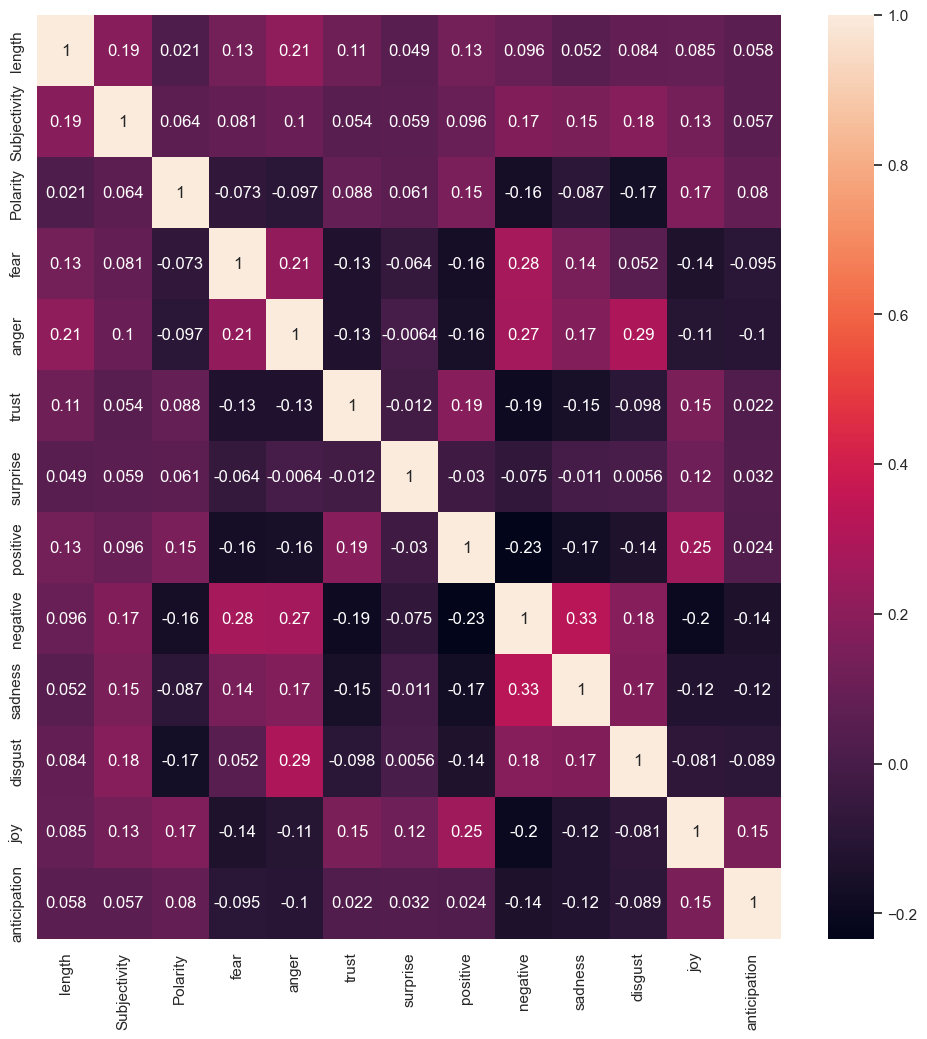

In [236]:
# Plot a correlation matrix
corr_matrix = sort_data.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Is there any correlation? What does our heatmap mean?